In [245]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

A=pd.read_excel("Impact Test Excel.xlsx")
A.info()
A.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Layer Height          39 non-null     float64
 1   Top/Bottom Pattern    39 non-null     object 
 2   Intial layer Height   39 non-null     float64
 3   Infill Density        39 non-null     int64  
 4   Infill Pattern        39 non-null     object 
 5   Infill Line Width     39 non-null     object 
 6   Impact Strength(J/m)  39 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.7+ KB


,Layer Height,Top/Bottom Pattern,Intial layer Height,Infill Density,Infill Pattern,Infill Line Width,Impact Strength(J/m)
0,0.2,Line,0.2,100,Line,0.2,23.6
1,0.2,Line,0.2,100,Grid,0.2,29.0
2,0.2,Line,0.2,100,Triangles,0.2,62.6
3,0.2,Line,0.2,100,Tri-Hexagon,0.2,13.6
4,0.2,Line,0.2,100,Cubic,0.2,30.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Infill Pattern', ylabel='Impact Strength(J/m)'>

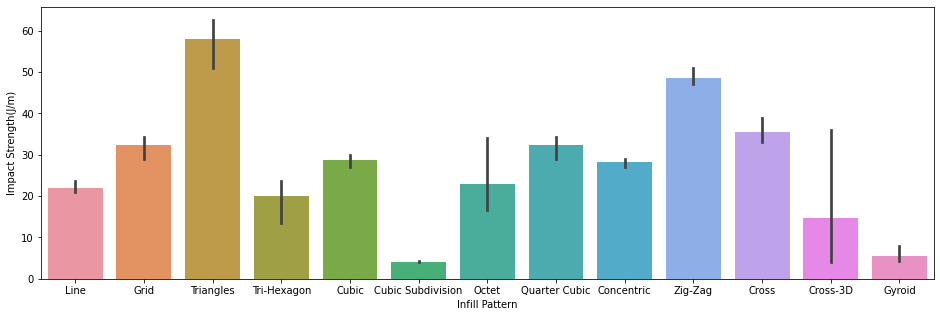

In [246]:
Z=A.drop(["Top/Bottom Pattern","Infill Line Width"],axis=1)
Z
X=Z.iloc[:,:-1]
Y=Z.iloc[:,-1]
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(Z["Infill Pattern"],Z["Impact Strength(J/m)"],ax=ax)


(array([8., 1., 4., 5., 7., 8., 0., 2., 2., 2.]),
 array([ 4.  ,  9.86, 15.72, 21.58, 27.44, 33.3 , 39.16, 45.02, 50.88,
        56.74, 62.6 ]),
 <BarContainer object of 10 artists>)

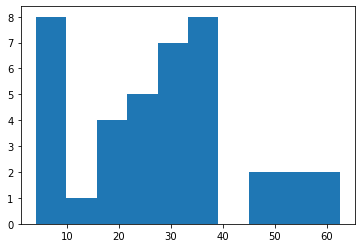

In [247]:
plt.hist(Z["Impact Strength(J/m)"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Layer Height          39 non-null     float64
 1   Intial layer Height   39 non-null     float64
 2   Infill Density        39 non-null     int64  
 3   Infill Pattern        39 non-null     object 
 4   Impact Strength(J/m)  39 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


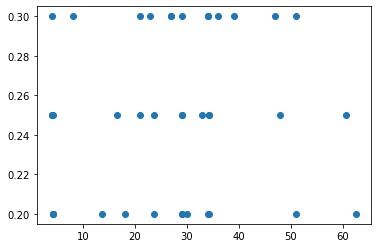

In [268]:
plt.scatter(Z["Impact Strength(J/m)"],Z["Layer Height"])
Z.info()

In [249]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


X=Z.iloc[:,:-1]
Y=Z.iloc[:,-1]



In [250]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),["Infill Pattern"])
]
,remainder='passthrough')
X=trf.fit_transform(X)







In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=70)

In [252]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred=Lr.predict(X_test)



In [253]:
from sklearn import metrics
print(f'MAE:{metrics.mean_absolute_error(Y_test, pred)}')

MAE:4.154166666666659


In [254]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
print(f"Test_model_score: {rfr.score(X_test,Y_test)}")
print(f"Train_model_score: {rfr.score(X_train,Y_train)}")



Test_model_score: 0.6953952778952714
Train_model_score: 0.9353701280060761


In [260]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)

In [265]:
print(f"Model Accuracy:{clf.score(X_test,Y_test)}")

Model Accuracy:0.7946620421284156


In [266]:
print(f"Model Accuracy:{clf.score(X_train,Y_train)}")

Model Accuracy:1.0


In [166]:
Y_test_scaled

array([[ 0.14142136, -1.        ,  0.        , -0.35355339, -0.28284271,
        -0.28284271, -0.35355339,  5.09901951, -0.35355339, -0.28284271,
        -0.19611614, -0.19611614, -0.19611614, -0.35355339, -0.35355339,
        -0.28284271],
       [ 0.14142136, -1.        ,  0.        , -0.35355339, -0.28284271,
        -0.28284271, -0.35355339, -0.19611614, -0.35355339, -0.28284271,
        -0.19611614,  5.09901951, -0.19611614, -0.35355339, -0.35355339,
        -0.28284271],
       [ 1.41421356, -1.        ,  0.        , -0.35355339, -0.28284271,
         3.53553391, -0.35355339, -0.19611614, -0.35355339, -0.28284271,
        -0.19611614, -0.19611614, -0.19611614, -0.35355339, -0.35355339,
        -0.28284271],
       [-1.13137085, -1.        ,  0.        , -0.35355339, -0.28284271,
        -0.28284271, -0.35355339, -0.19611614, -0.35355339, -0.28284271,
         5.09901951, -0.19611614, -0.19611614, -0.35355339, -0.35355339,
        -0.28284271],
       [ 1.41421356, -1.        ,  0

Train_model_score: 0.9339082403846152
